In [2]:
import pandas as pd
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
import fiona

%matplotlib inline

Read in cyclist crash data

In [3]:
df = pd.read_csv(r'C:\Users\new\Documents\Pedestrian_Crashes.csv')

In [4]:
df

,Crash ID,Crash Date,Crash Time,Severity,Crash Type,Pedestrians,Pedestrian Casualties,Reported Location,LATITUDE,LONGITUDE
0,1145041,07-10-16,8:45,Injury,Struck pedestrian (On Road),1,1,PARRAMATTA/ATHLLON INTERSECTION,-35.354768,149.091489
1,1108346,09-04-15,8:45,Property Damage Only,Struck pedestrian (On Road),1,0,BARRY DRIVE (MOORE -> COOYONG/NORTHBOURNE),-35.275659,149.128623
2,1095195,15-09-14,16:20,Property Damage Only,Struck pedestrian (On Road),1,0,PERRY DRIVE (MUSGROVE -> HEATH),-35.356968,149.036867
3,1075343,23-11-13,21:00,Property Damage Only,Struck pedestrian (On Road),1,0,FURNEAUX/PALMERSTON INTERSECTION,-35.319716,149.131873
4,1121518,31-08-15,20:10,Injury,Struck pedestrian (On Road),1,1,BUNDA/GAREMA/SCOTTS INTERSECTION,-35.278106,149.132745
5,1059958,19-04-13,13:15,Property Damage Only,Struck pedestrian (On Road),1,0,ALINGA/NORTHBOURNE INTERSECTION,-35.278394,149.129052
6,1057147,11-02-12,23:32,Injury,Struck pedestrian (On Road),1,1,NORTHBOURNE AVENUE (LONDON -> ALINGA),-35.278960,149.129158
7,1119120,12-09-15,2:30,Injury,Struck pedestrian (On Road),1,1,LONDON CIRCUIT (EAST -> VERITY),-35.279713,149.130219
8,1054719,08-02-13,15:30,Injury,Struck pedestrian (Off Road),1,1,STANNER/HANNAH WITTON (SE) INTERSECTION,-35.160807,149.135306
9,1062725,14-04-13,16:00,Injury,Struck pedestrian (On Road),1,1,PIALLIGO AVENUE (SCHERGER -> AIR DISASTER ),-35.320153,149.207936


Convert LAT/LONGS into points:

In [5]:
geometry = [Point(xy) for xy in zip(df.LONGITUDE, df.LATITUDE)]
df = df.drop(['LONGITUDE', 'LATITUDE'], axis=1)
crs = {'init': 'epsg:32755'}
geo_df = GeoDataFrame(df, crs=crs, geometry=geometry)

In [6]:
geo_df.head()

,Crash ID,Crash Date,Crash Time,Severity,Crash Type,Pedestrians,Pedestrian Casualties,Reported Location,geometry
0,1145041,07-10-16,8:45,Injury,Struck pedestrian (On Road),1,1,PARRAMATTA/ATHLLON INTERSECTION,POINT (149.091489 -35.354768)
1,1108346,09-04-15,8:45,Property Damage Only,Struck pedestrian (On Road),1,0,BARRY DRIVE (MOORE -> COOYONG/NORTHBOURNE),POINT (149.128623 -35.275659)
2,1095195,15-09-14,16:20,Property Damage Only,Struck pedestrian (On Road),1,0,PERRY DRIVE (MUSGROVE -> HEATH),POINT (149.036867 -35.356968)
3,1075343,23-11-13,21:00,Property Damage Only,Struck pedestrian (On Road),1,0,FURNEAUX/PALMERSTON INTERSECTION,POINT (149.131873 -35.319716)
4,1121518,31-08-15,20:10,Injury,Struck pedestrian (On Road),1,1,BUNDA/GAREMA/SCOTTS INTERSECTION,POINT (149.132745 -35.278106)


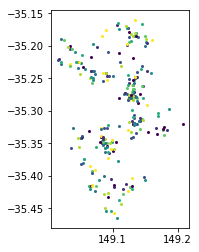

In [7]:
geo_df.plot()

In [14]:
geo_df.columns

Index(['Crash ID', 'Crash Date', 'Crash Time', 'Severity', 'Crash Type',
       'Pedestrians', 'Pedestrian Casualties', 'Reported Location',
       'geometry'],
      dtype='object')

Group crashes by location:

In [9]:
tally = df.groupby('Reported Location').count()
tally.head()

,Crash ID,Crash Date,Crash Time,Severity,Crash Type,Pedestrians,Pedestrian Casualties,geometry
Reported Location,,,,,,,,
AINSLIE AVENUE (KOGARAH -> COOYONG),1,1,1,1,1,1,1,1
AINSLIE/COOYONG INTERSECTION,1,1,1,1,1,1,1,1
AINSWORTH STREET (COLBECK -> AINSWORTH),1,1,1,1,1,1,1,1
AKUNA/LONDON INTERSECTION,1,1,1,1,1,1,1,1
ALINGA STREET (VERITY -> CITY/EAST/MORT),1,1,1,1,1,1,1,1


In [11]:
tally = pd.DataFrame(df.groupby('Reported Location').count().loc[:,'Pedestrians'])
tally 

,Pedestrians
Reported Location,
AINSLIE AVENUE (KOGARAH -> COOYONG),1
AINSLIE/COOYONG INTERSECTION,1
AINSWORTH STREET (COLBECK -> AINSWORTH),1
AKUNA/LONDON INTERSECTION,1
ALINGA STREET (VERITY -> CITY/EAST/MORT),1
ALINGA/CITY/EAST/MORT INTERSECTION,1
ALINGA/MARCUS CLARKE INTERSECTION,1
ALINGA/NORTHBOURNE INTERSECTION,2
ALLSOP/MARCUS CLARKE INTERSECTION,1


In [17]:
geo_df.columns

Index(['Crash ID', 'Crash Date', 'Crash Time', 'Severity', 'Crash Type',
       'Pedestrians', 'Pedestrian Casualties', 'Reported Location',
       'geometry'],
      dtype='object')

In [19]:
polygon_df = geo_df[['Reported Location', 'Severity', 'Pedestrians', 'Crash Date', 'Crash Time', 'geometry']].sort_values('Reported Location')

In [313]:
polygon_df.head()

,REPORTED_LOCATION,SEVERITY,CYCLISTS,CRASH_DATE,CRASH_TIME,geometry
381,AINSLIE/LIMESTONE INTERSECTION,Property Damage Only,1,27-Mar-14,18:30,POINT (149.143722 -35.276175)
1030,AINSLIE/LIMESTONE INTERSECTION,Property Damage Only,1,15-Nov-16,17:30,POINT (149.143848 -35.276403)
481,AINSLIE/LIMESTONE INTERSECTION,Property Damage Only,1,04-Sep-13,8:20,POINT (149.14379 -35.2763)
924,ALEXANDRINA/CORONATION/FLYNN INTERSECTION,Injury,1,06-Nov-12,12:20,POINT (149.122262 -35.300487)
1091,ALEXANDRINA/CORONATION/FLYNN INTERSECTION,Property Damage Only,1,27-May-17,11:00,POINT (149.122097 -35.300368)


In [20]:
type(polygon_df)

geopandas.geodataframe.GeoDataFrame

In [21]:
polygon_df.to_file('pedestrian_crashes')

Attempt to buffer all the points to create dataframes

Dissolve all points, then buffer them with tiny polygons, which we can then dissolve, thus making everything a polygon

In [308]:
buffer_geo = GeoDataFrame(polygon_df.dissolve('REPORTED_LOCATION').buffer(0.0001), crs = crs)

In [309]:
type(buffer_geo)

geopandas.geodataframe.GeoDataFrame

In [310]:
buffer_geo

,0
REPORTED_LOCATION,
AINSLIE/LIMESTONE INTERSECTION,POLYGON ((149.1436942925883 -35.27627102494088...
ALEXANDRINA/CORONATION/FLYNN INTERSECTION,"(POLYGON ((149.122362 -35.300487, 149.12236151..."
ANTILL/MOUAT/NORTHBOURNE INTERSECTION,POLYGON ((149.1340183624033 -35.24829026155257...
ATHLLON/BEASLEY (SW) INTERSECTION,"POLYGON ((149.092995 -35.371915, 149.092994518..."
ATHLLON/DRAKEFORD/ISABELLA INTERSECTION,(POLYGON ((149.0784473044783 -35.4241372107507...
ATHLLON/SULWOOD INTERSECTION,"(POLYGON ((149.093174 -35.384319, 149.09317351..."
BARRY/BOLDREWOOD INTERSECTION,"POLYGON ((149.1202011580452 -35.2729357829154,..."
BARRY/COOYONG/NORTHBOURNE INTERSECTION,POLYGON ((149.1295212461483 -35.27584682711763...
BARRY/MARCUS CLARKE INTERSECTION,POLYGON ((149.1267075348974 -35.27555153500933...


In [297]:
buffer_geo.columns = ['geometry']

In [300]:
buffer_geo

,geometry
REPORTED_LOCATION,
AINSLIE/LIMESTONE INTERSECTION,POLYGON ((149.1436942925883 -35.27627102494088...
ALEXANDRINA/CORONATION/FLYNN INTERSECTION,"(POLYGON ((149.122362 -35.300487, 149.12236151..."
ANTILL/MOUAT/NORTHBOURNE INTERSECTION,POLYGON ((149.1340183624033 -35.24829026155257...
ATHLLON/BEASLEY (SW) INTERSECTION,"POLYGON ((149.092995 -35.371915, 149.092994518..."
ATHLLON/DRAKEFORD/ISABELLA INTERSECTION,(POLYGON ((149.0784473044783 -35.4241372107507...
ATHLLON/SULWOOD INTERSECTION,"(POLYGON ((149.093174 -35.384319, 149.09317351..."
BARRY/BOLDREWOOD INTERSECTION,"POLYGON ((149.1202011580452 -35.2729357829154,..."
BARRY/COOYONG/NORTHBOURNE INTERSECTION,POLYGON ((149.1295212461483 -35.27584682711763...
BARRY/MARCUS CLARKE INTERSECTION,POLYGON ((149.1267075348974 -35.27555153500933...


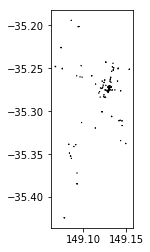

In [301]:
buffer_geo.plot()

In [302]:
type(buffer_geo)

geopandas.geodataframe.GeoDataFrame

In [303]:
buffer_geo.to_file('crashes2')

In [273]:
type(buffer_geo)

list

In [272]:
buffer_geo.columns = ['geometry']

AttributeError: 'list' object has no attribute 'columns'